## Evaluating Mixture model of group and individual
Using MDTB leave-one-subject-out models and individuals:
- Does the mixture perform better on that subject?
- What is the performance gain?
- What is the optimal mixing parameter?

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt

In [68]:
train_ds_list = ["MDTB", "Language", "Social", "WMFS", "Demand", "Somatotopic", "Nishimoto", "IBC"]#, "Fusion"]
eval_names = ["MDTB", "Languagelocalizer", "Socialsocial", "WMFS", "Demand", "Somatotopic", "Nishimoto", "IBC"]
logalpha_list = [8, 8, 8, 8, 8, 10, 10, 6]

df_mix = pd.DataFrame()
df_loo = pd.DataFrame()
for td, ed, la in zip(train_ds_list, eval_names, logalpha_list):
    df = rm.comb_eval(models=[f'{td}-mix-CV-Cavg'], eval_data=[ed], methods=['L2reg'], cerebellum='MNISymC3')
    df['model_type'] = 'mix'
    df_mix = pd.concat([df_mix, df], ignore_index=True)

    # df = rm.comb_eval(models=[f'{td}-loo-Cavg'], eval_data=[ed], methods=['L2reg'], cerebellum='MNISymC3')
    # df = df[df.logalpha==la]
    # df['model_type'] = 'loo'
    # df_loo = pd.concat([df_loo, df], ignore_index=True)

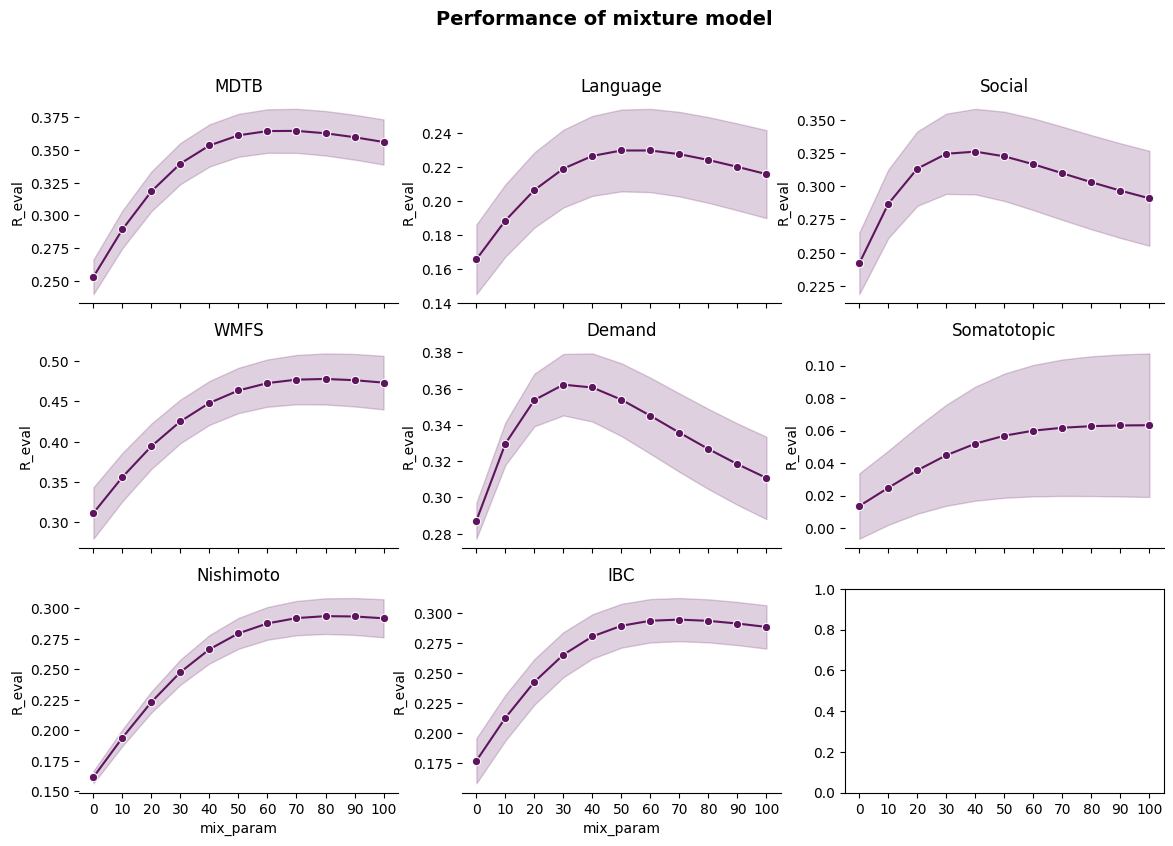

In [69]:
colors = ["#5e145e", "#3275a1", "#3a923a", "#c03d3e"]

# plotting the mixed model performance
fig, axes = plt.subplots(3,3,figsize=(14,9), sharex='col')

for i, ds in enumerate(train_ds_list):
    df_mix_subset = df_mix[df_mix['train_dataset']==ds]
    # df_loo_subset = df_loo[df_loo['train_dataset']==ds]

    ax = axes[i//3, i%3]
    sns.lineplot(data=df_mix_subset, x='mix_param', y='R_eval', errorbar='se', marker='o', color=colors[0], ax=ax)

    # plotting the horizontal lines for comparison
    # ax.axhline(y=df_loo_subset[df_loo_subset['model_type'] == 'loo']['R_eval'].mean(), color=colors[3], linestyle=':', label='loo')

    # decoration
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks(np.linspace(0,100,11))
    # ax.text(x=50,y=df_loo_subset[df_loo_subset['model_type']=='loo']['R_eval'].mean(),s='loo',color=colors[3],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
    ax.set_title(f'{ds}')

plt.suptitle('Performance of mixture model', fontsize=14, fontweight='bold');
# plt.ylim([0.3, 0.44])

In [38]:
df_mix=rm.comb_eval(models=['mix-all-scale'], eval_data=['MDTBs2'])
df_mix['model_type'] = 'mix'

df2=rm.comb_eval(models=['MDs1-ind-scale','MDs1-avg-scale','MDs1-loo-scale'],eval_data=['MDTBs2'])
df2['model_type'] = df2['model']
df2.loc[df2['model'].isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2['model'].isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

(0.3, 0.44)

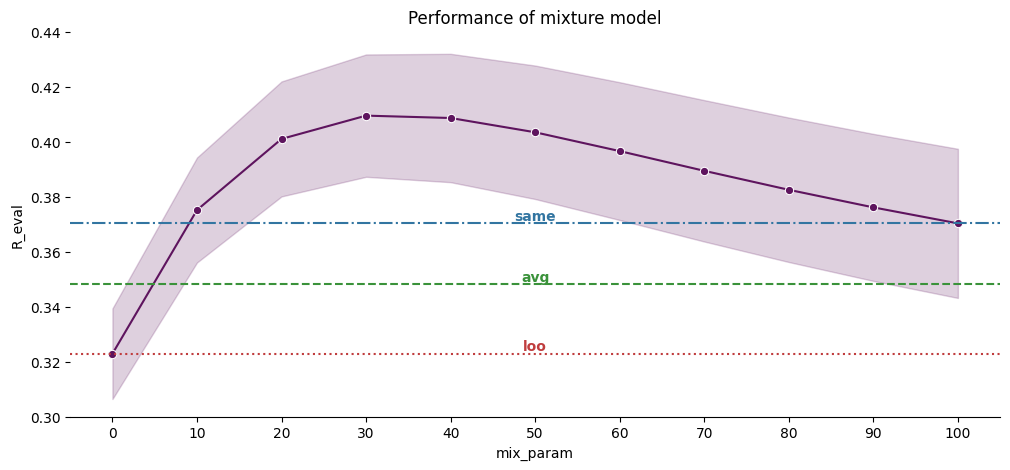

In [39]:
colors = ["#5e145e", "#3275a1", "#3a923a", "#c03d3e"]

# plotting the mixed model performance
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=df_mix,x='mix_param',y='R_eval',errorbar='se',marker='o',color=colors[0])

# plotting the horizontal lines for comparison
plt.axhline(y=df2[df2['model_type']=='same']['R_eval'].mean(), color=colors[1], linestyle='-.', label='same')
plt.axhline(y=df2[df2['model_type']=='avg']['R_eval'].mean(), color=colors[2], linestyle='--', label='avg')
plt.axhline(y=df2[df2['model_type']=='loo']['R_eval'].mean(), color=colors[3], linestyle=':', label='loo')

# # decoration
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks(np.linspace(0,100,11))
ax.text(x=50,y=df2[df2['model_type']=='same']['R_eval'].mean(),s='same',color=colors[1],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
ax.text(x=50,y=df2[df2['model_type']=='avg']['R_eval'].mean(),s='avg',color=colors[2],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
ax.text(x=50,y=df2[df2['model_type']=='loo']['R_eval'].mean(),s='loo',color=colors[3],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
plt.title('Performance of mixture model')
plt.ylim([0.3, 0.44])

The script below selects a subset of n subjects from top of the subject list to calculate the loo model.
Evaluation will be on all subjects for comparison.

In [5]:
df_mix=rm.comb_eval(models=['mix-5'], eval_data=['MDTBs2'])
df_mix['subject_num'] = 5
df_temp=rm.comb_eval(models=['mix-8'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 8
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)
df_temp=rm.comb_eval(models=['mix-14'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 14
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)
df_temp=rm.comb_eval(models=['mix-20'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 20
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)
df_temp=rm.comb_eval(models=['mix-all'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 'all'
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)


df2=rm.comb_eval(models=['MDs1-ind','MDs1-avg','MDs1-loo'],eval_data=['MDTBs2'])
df2['model_type'] = df2['model']
df2.loc[df2['model'].isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2['model'].isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

Text(0.5, 1.0, 'Performance of mixture model')

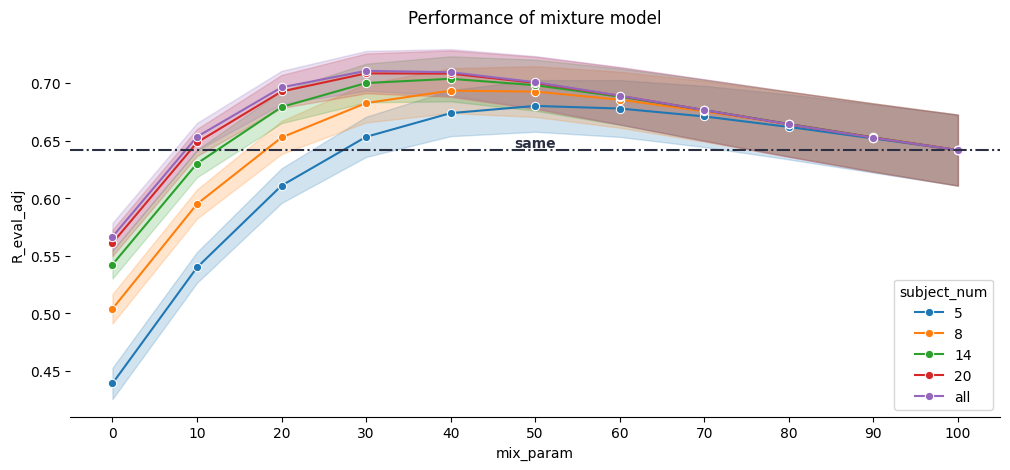

In [6]:
colors = ["#EF233C", "#2B2F42", "gray", "#8E99AD"]

# plotting the mixed model performance
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=df_mix,x='mix_param',y='R_eval_adj',hue='subject_num',errorbar='se',marker='o',color=colors[0])

# plotting the horizontal lines for comparison
plt.axhline(y=df2[df2['model_type']=='same']['R_eval_adj'].mean(), color=colors[1], linestyle='-.', label='same')
# plt.axhline(y=df2[df2['model_type']=='avg']['R_eval'].mean(), color=colors[2], linestyle='--', label='avg')
# plt.axhline(y=df2[df2['model_type']=='loo']['R_eval'].mean(), color=colors[3], linestyle=':', label='loo')

# # decoration
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks(np.linspace(0,100,11))
ax.text(x=50,y=df2[df2['model_type']=='same']['R_eval_adj'].mean(),s='same',color=colors[1],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
# ax.text(x=50,y=df2[df2['model_type']=='avg']['R_eval'].mean(),s='avg',color=colors[2],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
# ax.text(x=50,y=df2[df2['model_type']=='loo']['R_eval'].mean(),s='loo',color=colors[3],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
plt.title('Performance of mixture model') 